In [3]:
import torch
import os
import glob
from IPython.display import Image, display
import comet_ml

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

ModuleNotFoundError: No module named 'comet_ml'

In [2]:
!python3 train.py --img 640 --batch 16 --epochs 1 --data fire.yaml --weights yolov5s.pt --nosave --cache

train: weights=yolov5s.pt, cfg=, data=fire.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v7.0-307-g920c721e Python-3.8.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7941MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1

In [4]:
from utils.plots import plot_results
plot_results('runs/train/exp4/results.csv')

In [7]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source ../datasets/fire/val/images/

detect: weights=['runs/train/exp4/weights/best.pt'], source=../datasets/fire/val/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.8.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7941MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 /home/hqquyen/Downloads/yolov5/datasets/fire/val/images/0.jpg: 480x640 1 fire, 34.5ms
image 2/150 /home/hqquyen/Downloads/yolov5/datasets/fire/val/images/0016f8c09384627e.jpg: 480x640 1 fire, 5.9ms
image 3/150 /home/hqquyen/Downloads/yolov5/datasets/fire/val/images/004dec94c5de631f.jpg: 

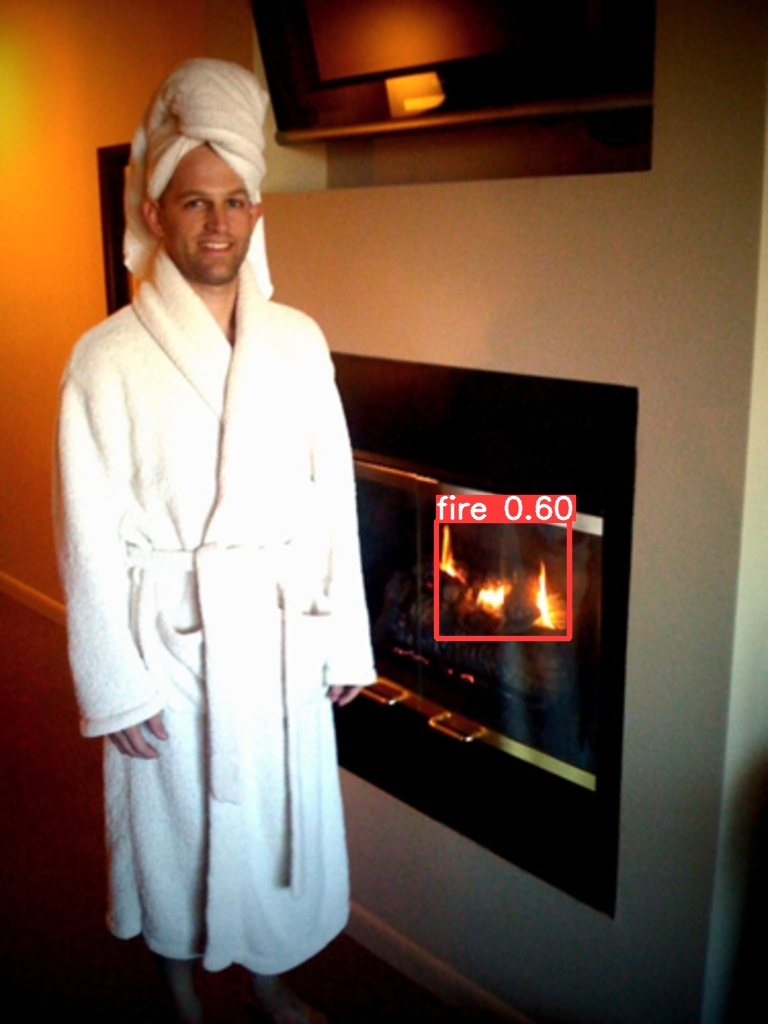

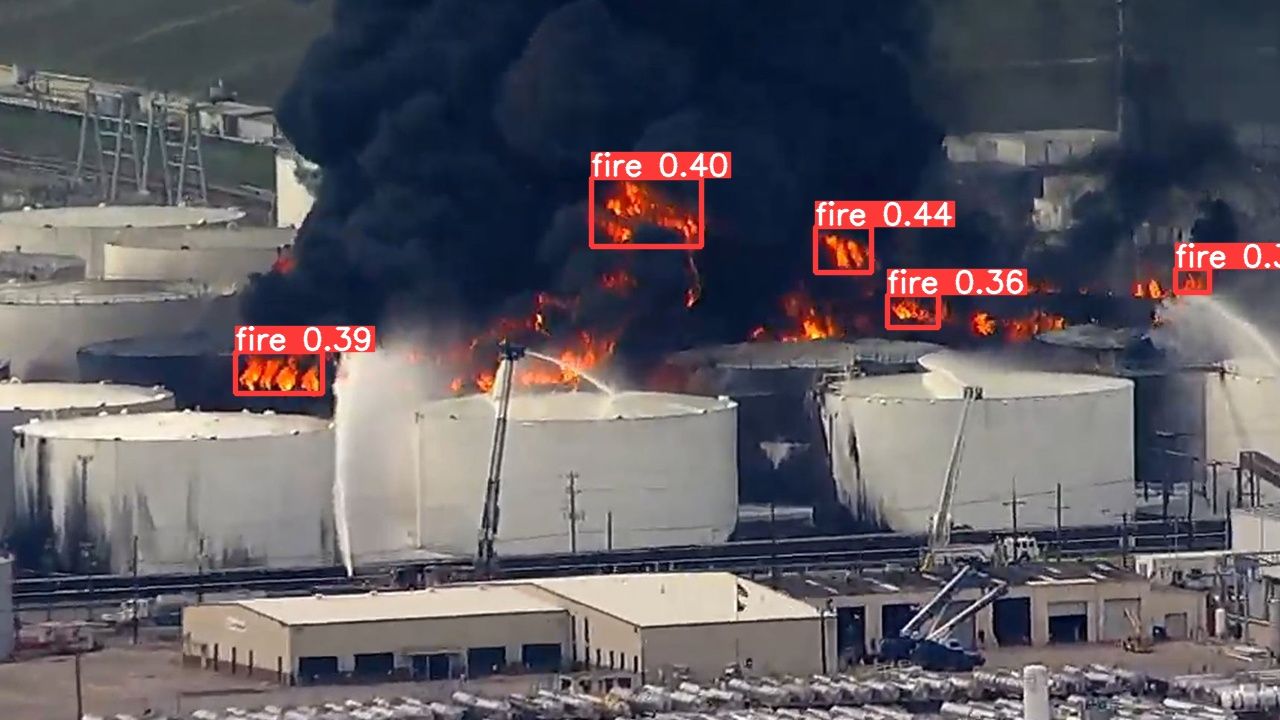

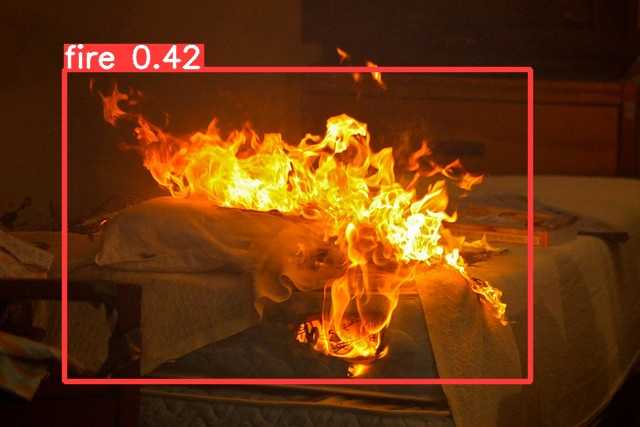

In [8]:
#display inference on some test images
images = glob.glob('runs/detect/exp4/*.jpg')

for imageName in images[:3]: #assuming JPG
    display(Image(filename=imageName, width=400))

In [9]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source ../input.mp4

detect: weights=['runs/train/exp4/weights/best.pt'], source=../input.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.8.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7941MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "detect.py", line 312, in <module>
    main(opt)
  File "detect.py", line 307, in main
    run(**vars(opt))
  File "/home/hqquyen/.local/lib/python3.8/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "detect.py

In [18]:
import cv2
vidcap = cv2.VideoCapture('input.mp4')
success,image = vidcap.read()
images = []
while success:
    success,image = vidcap.read()
    if success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

In [20]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml')

def create_animation(ims):
    print("images = ",images)
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    print(ims)
    im = plt.imshow(ims[0])

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//12)

create_animation(images)

images =  []
[]


IndexError: list index out of range

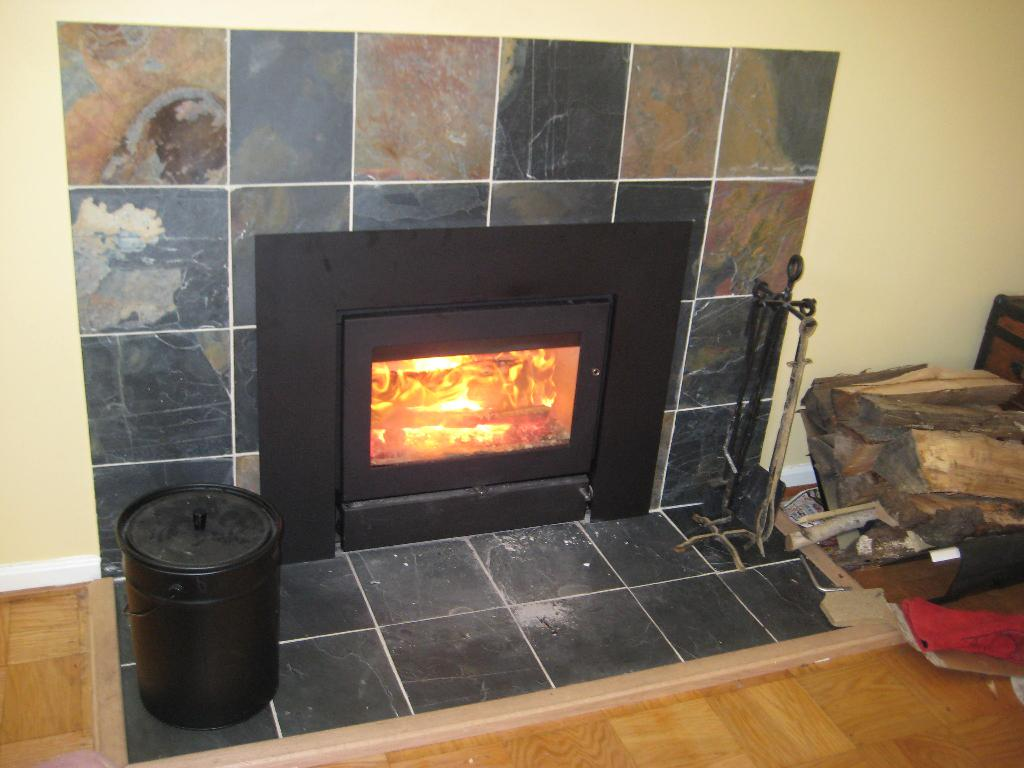

In [10]:
image_path = "../datasets/fire/val/images/004dec94c5de631f.jpg"
display(Image(filename=image_path, width=400))

In [11]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source {image_path} --visualize

detect: weights=['runs/train/exp4/weights/best.pt'], source=../datasets/fire/val/images/004dec94c5de631f.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.8.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7941MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Saving runs/detect/exp7/004dec94c5de631f/stage0_Conv_features.png... (32/32)
Saving runs/detect/exp7/004dec94c5de631f/stage1_Conv_features.png... (32/64)
Saving runs/detect/exp7/004dec94c5de631f/stage2_C3_features.png... (32/64)
Saving runs/detect/exp7/004dec94c5de631f/stage3_Conv

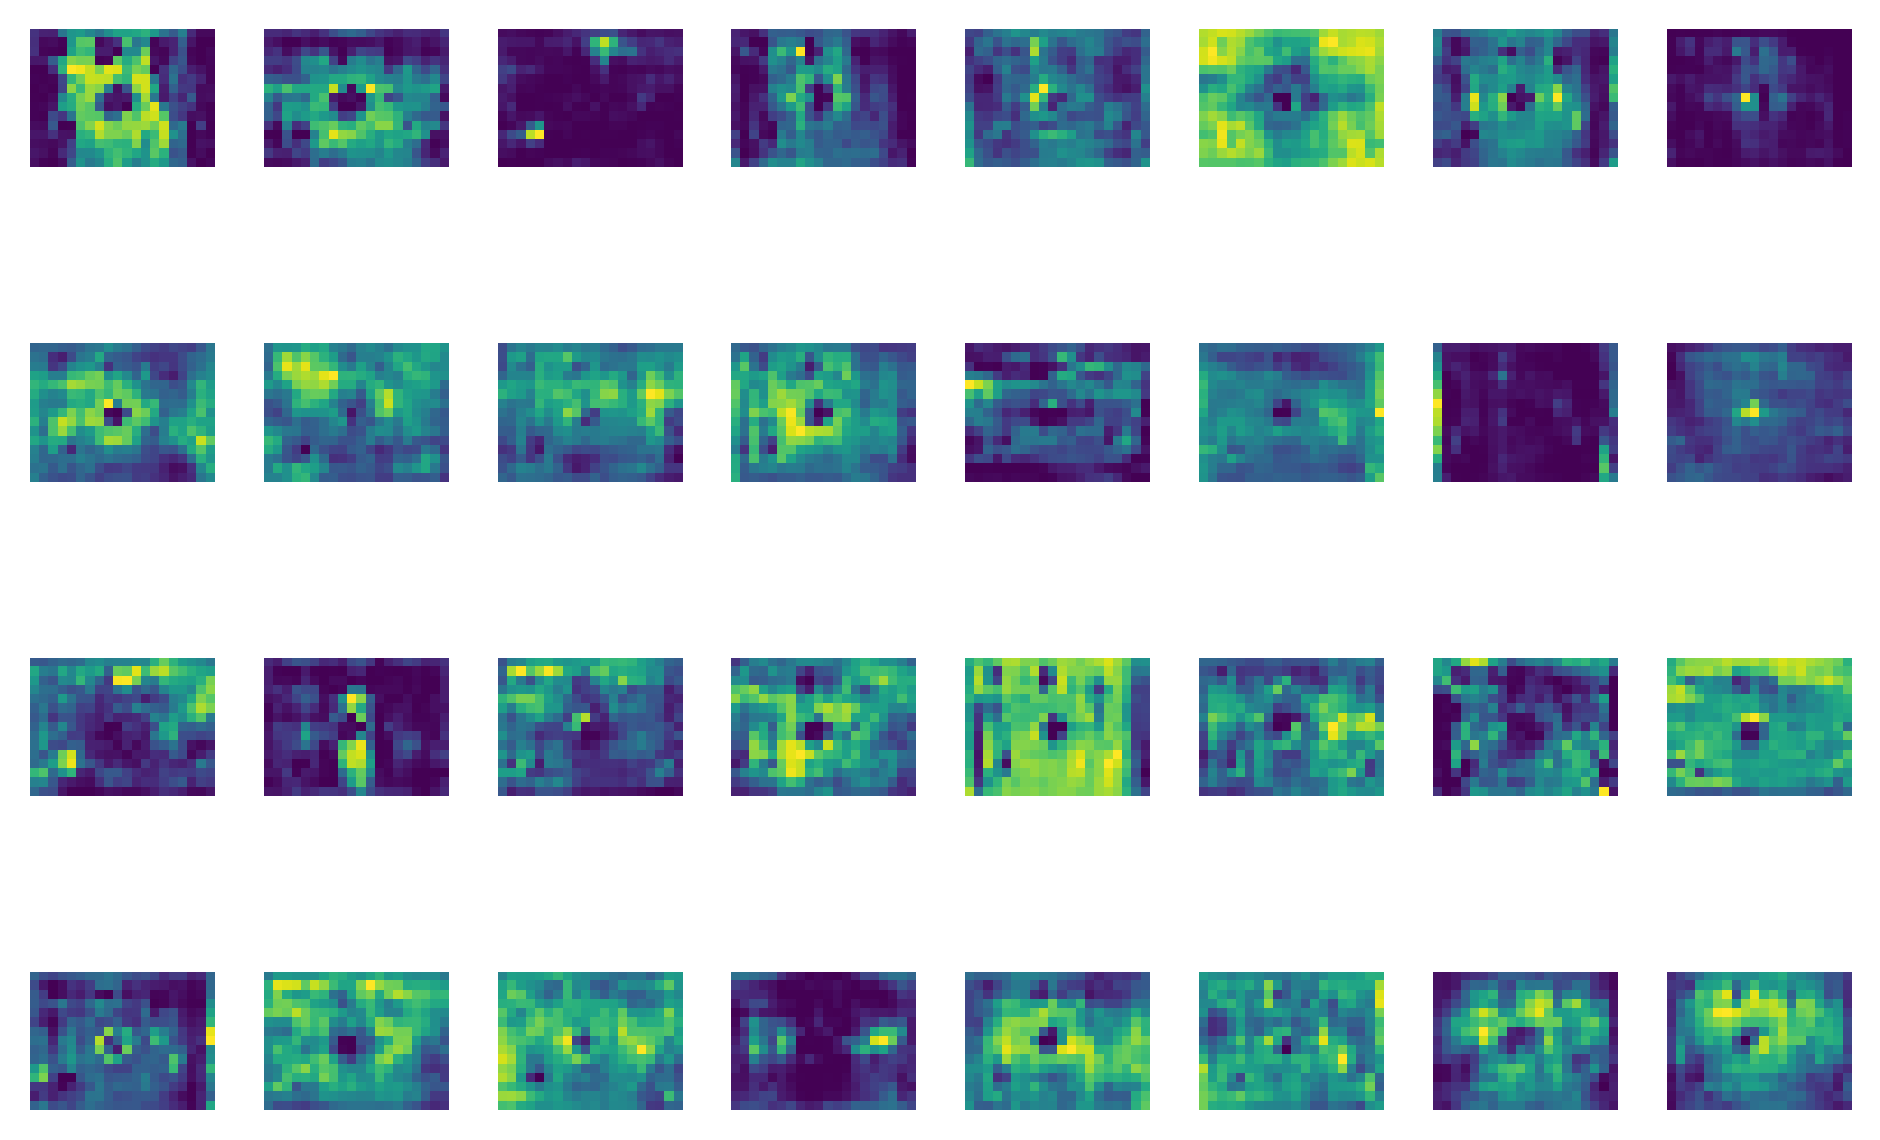

In [14]:
display(Image(filename="runs/detect/exp7/004dec94c5de631f/stage23_C3_features.png"))